# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [313]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [314]:
data = pd.read_csv('used_device_data.csv')

## Data Overview

### Displaying the first few rows of the dataset

In [315]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Checking the shape of the dataset

In [316]:
data.shape

(3454, 15)

There are 3454 rows and 15 columns in the dataset.

### Checking the data types of the columns for the dataset

In [317]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

- There are 11 numerical variables, including:
  - float64: 'screen_size', 'main_camera', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'normalized_used_price', 'normalized_new_price'.
  - int64: 'release_year', 'days_used'

- There are 4 non-numerical variables, including:
  - object: 'brand_name', 'os', '4g', '5g'

### Statistical summary of the dataset

In [318]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


### Checking for duplicate values

In [319]:
duplicates = data.duplicated()

# Print the DataFrame with duplicate rows
print(data[data.duplicated()])

Empty DataFrame
Columns: [brand_name, os, screen_size, 4g, 5g, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, normalized_used_price, normalized_new_price]
Index: []


There are no rows that have duplicated values.

### Checking for missing values

In [320]:
# checking for missing values
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

There are 201 rows with missing values. The missing values are in the 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight' columns. Most missing values are from 'main_camera_mp' column.

In [321]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

In [322]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [323]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`normalized_used_price`**

**Question 1: What does the distribution of normalized used device prices look like?**

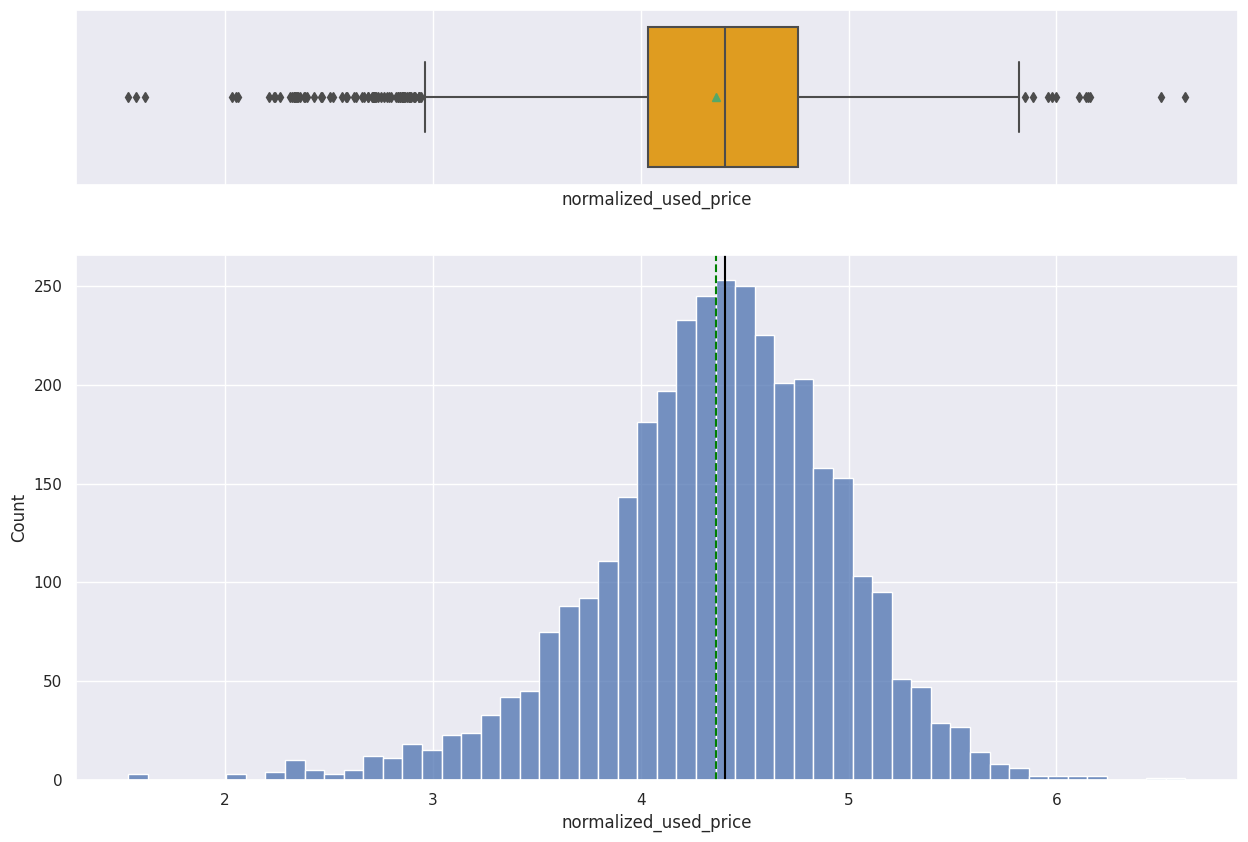

In [324]:
histogram_boxplot(df, "normalized_used_price")

Observation:
- Upon examining the boxplot, we observe that the 'normalized_used_price' variable exhibits a normal distribution. The mean value of 4.36 closely aligns with the median of 4.41, indicating a balanced distribution of values around the center.
- Notably, the boxplot also reveals the presence of numerous outliers on both sides, represented by the individual points beyond the whiskers.

**`normalized_new_price`**

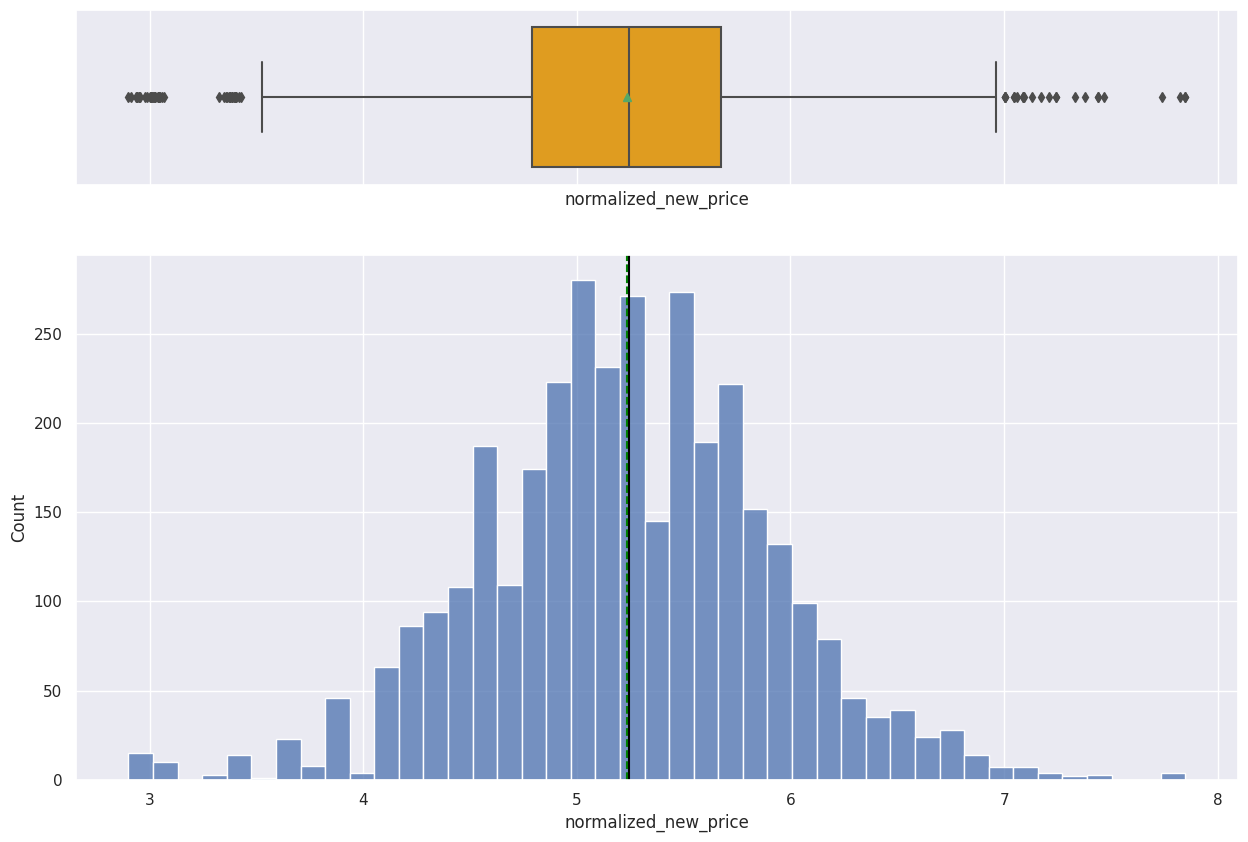

In [325]:
histogram_boxplot(df, "normalized_new_price") 

Observation:
- Upon examining the boxplot, we observe that the 'normalized_new_price' variable exhibits a symmetrical distribution. The mean value of 5.23 closely aligns with the median of 5.25, indicating a balanced distribution of values around the center.
- Notably, the boxplot also reveals the presence of numerous outliers on both sides, represented by the individual points beyond the whiskers.

**`screen_size`**

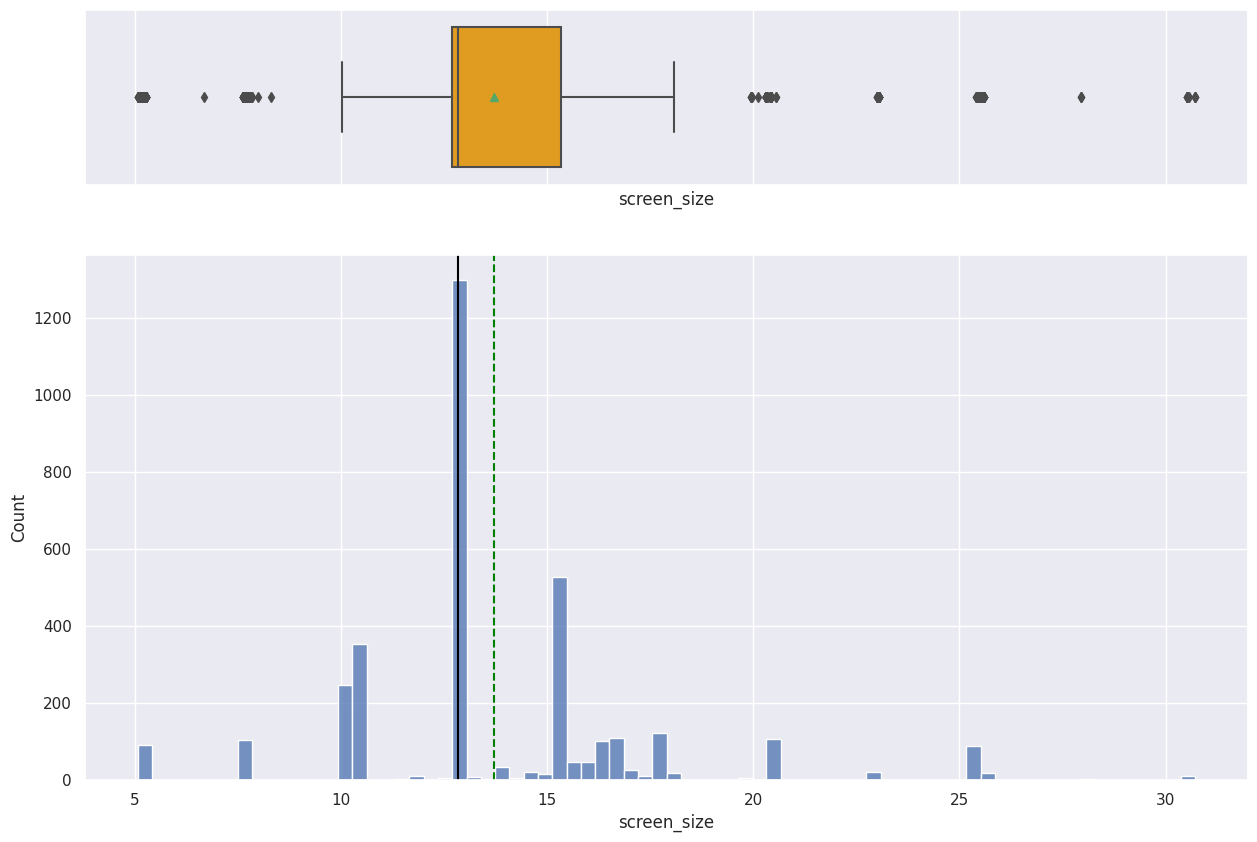

In [326]:
histogram_boxplot(df, 'screen_size')

Observation:

- Upon examining the boxplot, we observe that the 'screen_size' variable exhibits a right-skewd distribution. The mean value of 13.71 is greater than the median of 12.83.
- Notably, the boxplot also reveals the presence of numerous outliers on both sides, represented by the individual points beyond the whiskers.

**`main_camera_mp`**

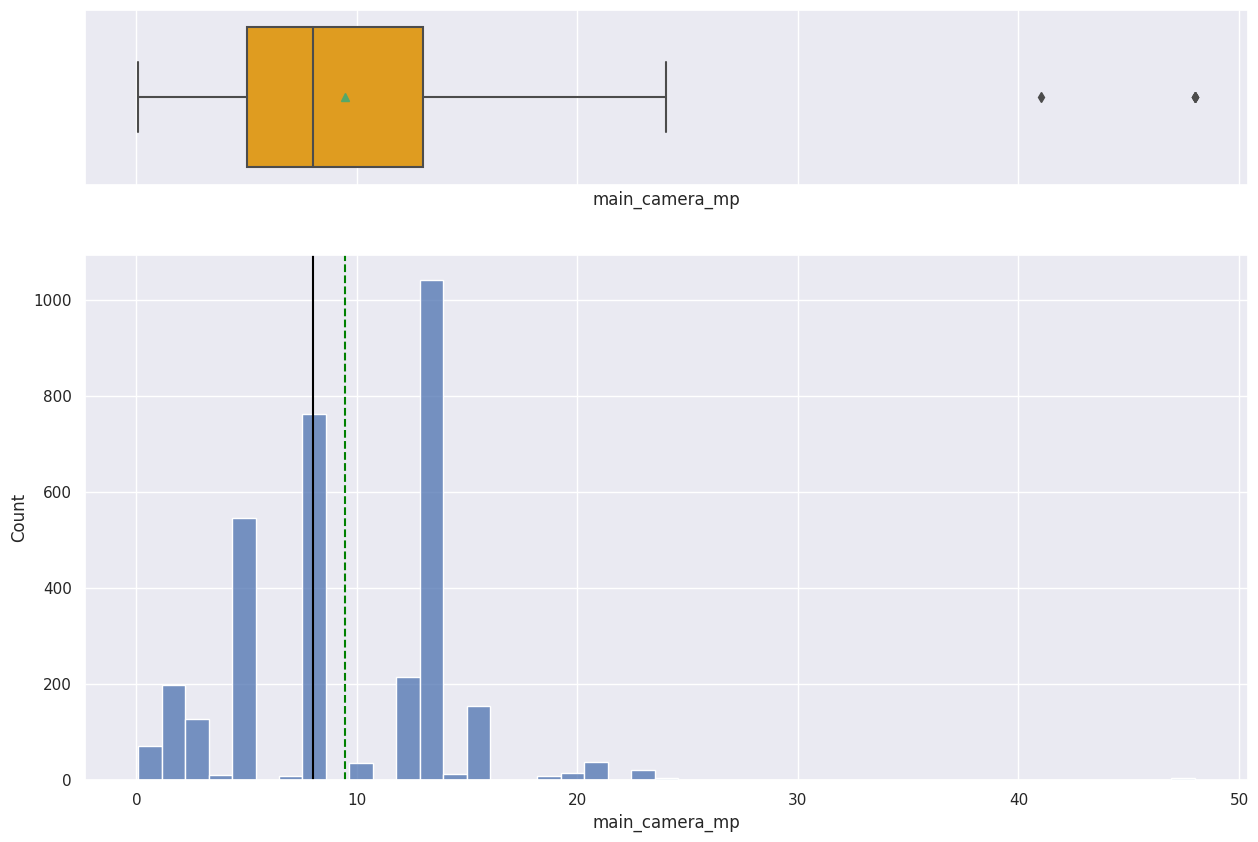

In [327]:
histogram_boxplot(df, 'main_camera_mp')

Observation:

- Upon examining the boxplot, we observe that the 'main_camera_mp' variable exhibits a right-skewd distribution. The mean value of 9.46 is greater than the median of 8.00.
- Notably, the boxplot also reveals the presence of 2 outliers on right side, represented by the individual points beyond the whiskers.

**`selfie_camera_mp`**

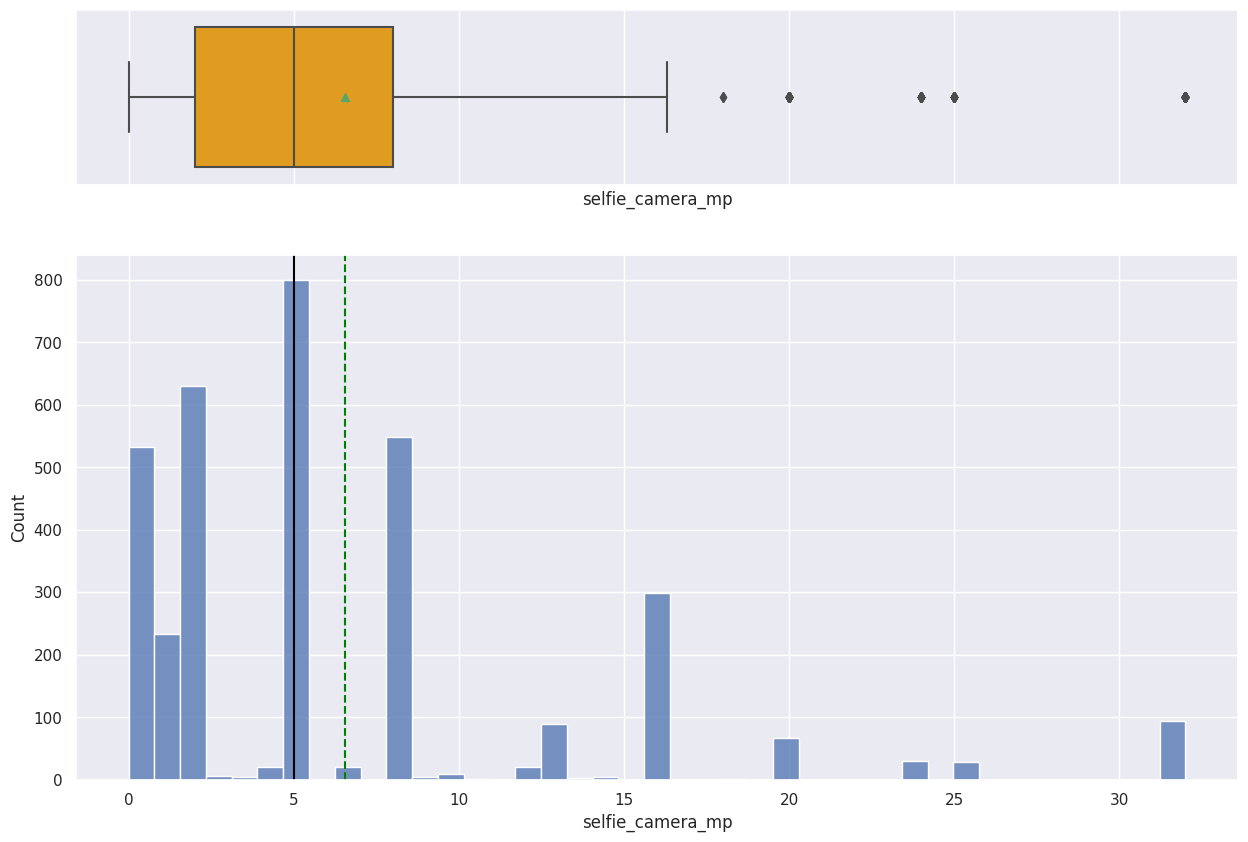

In [328]:
histogram_boxplot(df, 'selfie_camera_mp')

Observation:

- Upon examining the boxplot, we observe that the 'selfie_camera_mp' variable exhibits a right-skewd distribution. The mean value of 6.55 is greater than the median of 5.00.
- Notably, the boxplot also reveals the presence of five outliers on right side, represented by the individual points beyond the whiskers.

**`int_memory`**

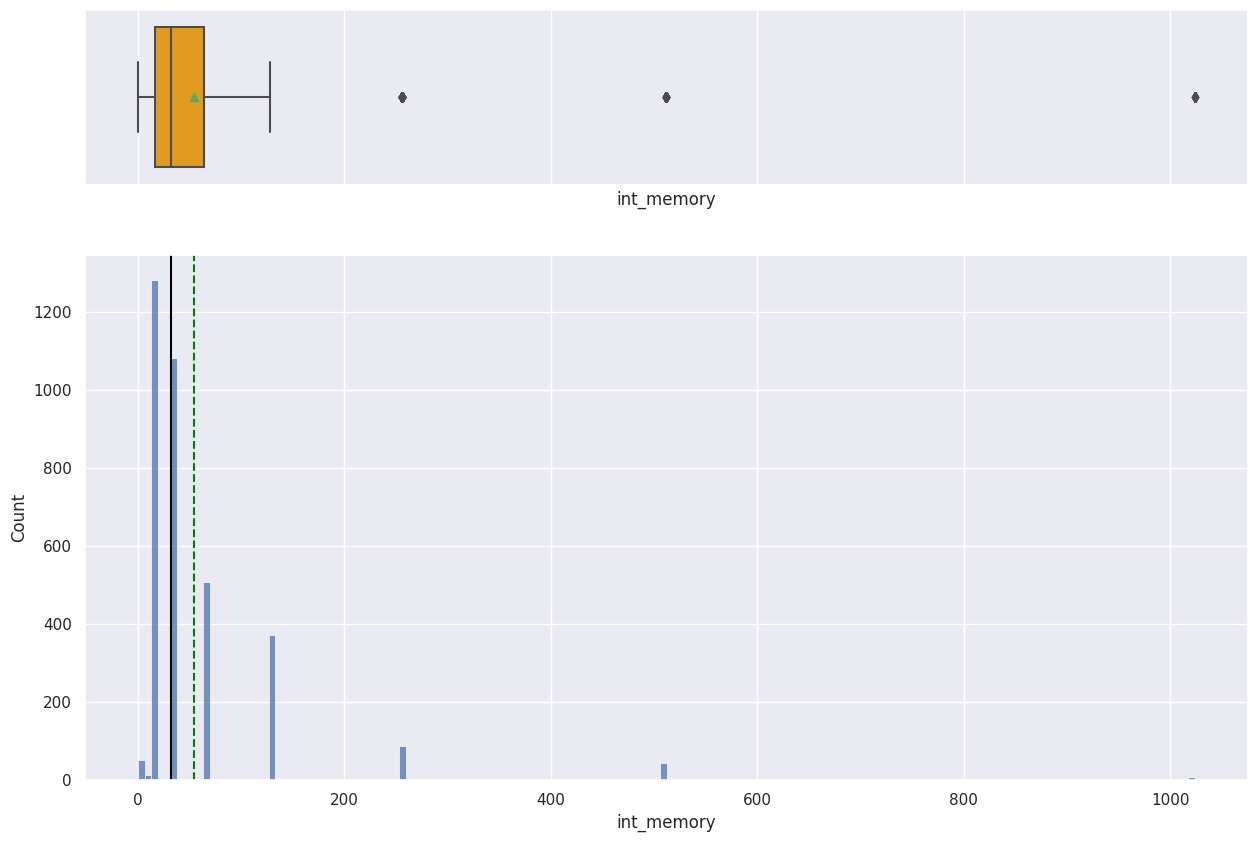

In [329]:
histogram_boxplot(df, 'int_memory')

Observation:

- Upon examining the boxplot, we observe that the 'int_memory' variable exhibits a very right-skewd distribution. The mean value of 54.57 is much greater than the median of 32.00.
- Notably, the boxplot also reveals the presence of three outliers on right side, represented by the individual points beyond the whiskers.

**`ram`**

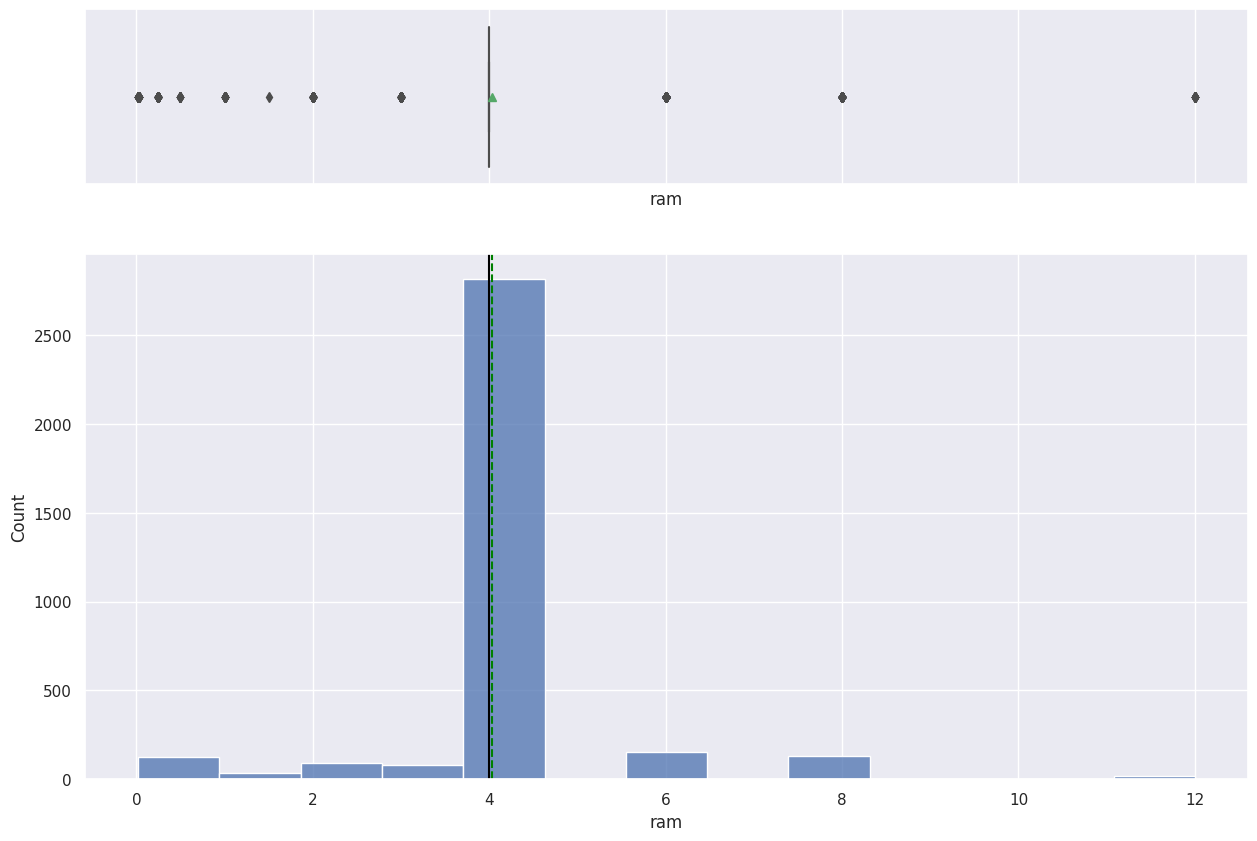

In [330]:
histogram_boxplot(df, 'ram')

Observation:

- Upon examining the boxplot, we observe that the 'ram' variable exhibits a relatively symmetric distribution. The mean value of 4.04 is very close to the median of 4.00.
- The values tend to be concentrated around the median and the first and third quartiles, as indicated by their equal values.
- Notably, the boxplot also reveals the presence of numerous outliers on both sides, represented by the individual points beyond the whiskers.

**`weight`**

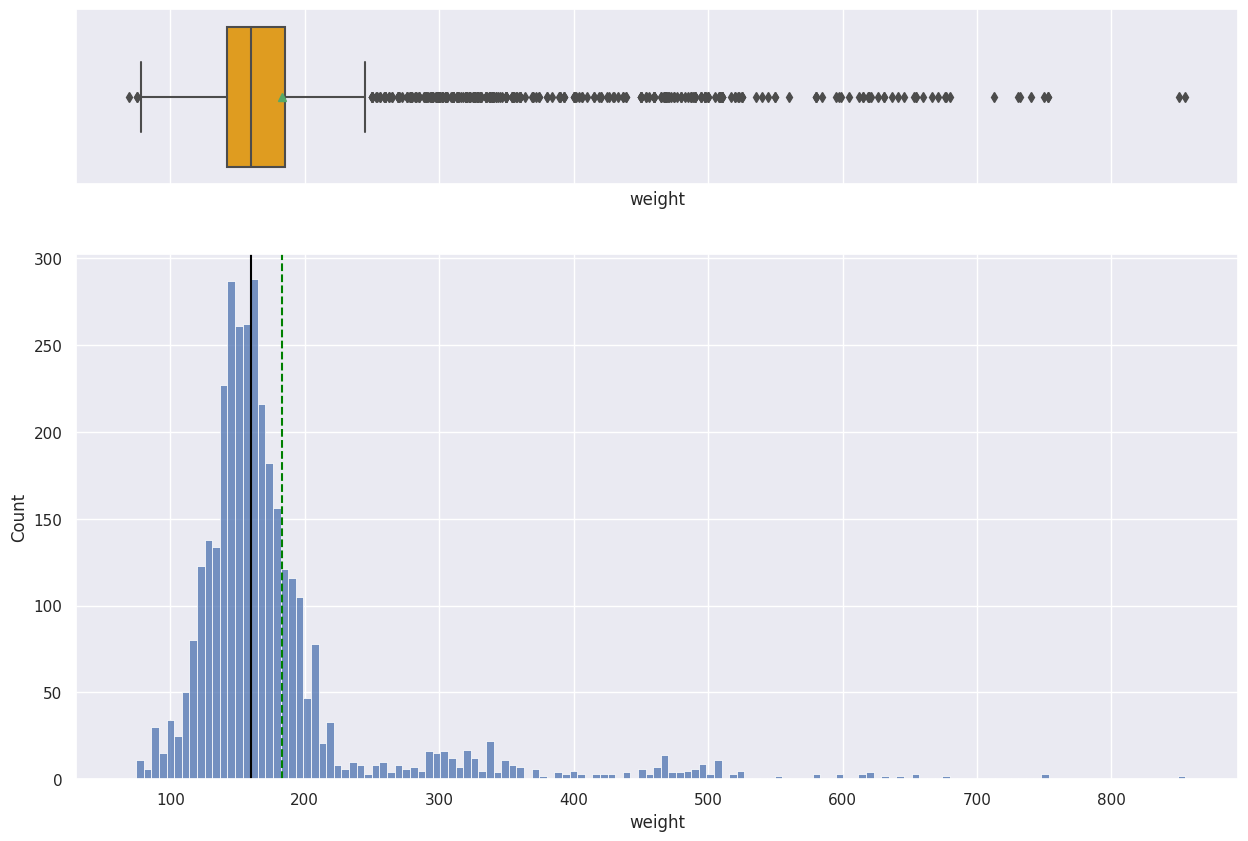

In [331]:
histogram_boxplot(df, 'weight')

Observation:

- Upon examining the boxplot, we observe that the 'weight' variable exhibits a relatively symmetric distribution. The mean value of 182.75 is much greater than the median of 160.00.
- Notably, the boxplot also reveals the presence of many outliers on right side and two outliers on left side, represented by the individual points beyond the whiskers.

**`battery`**

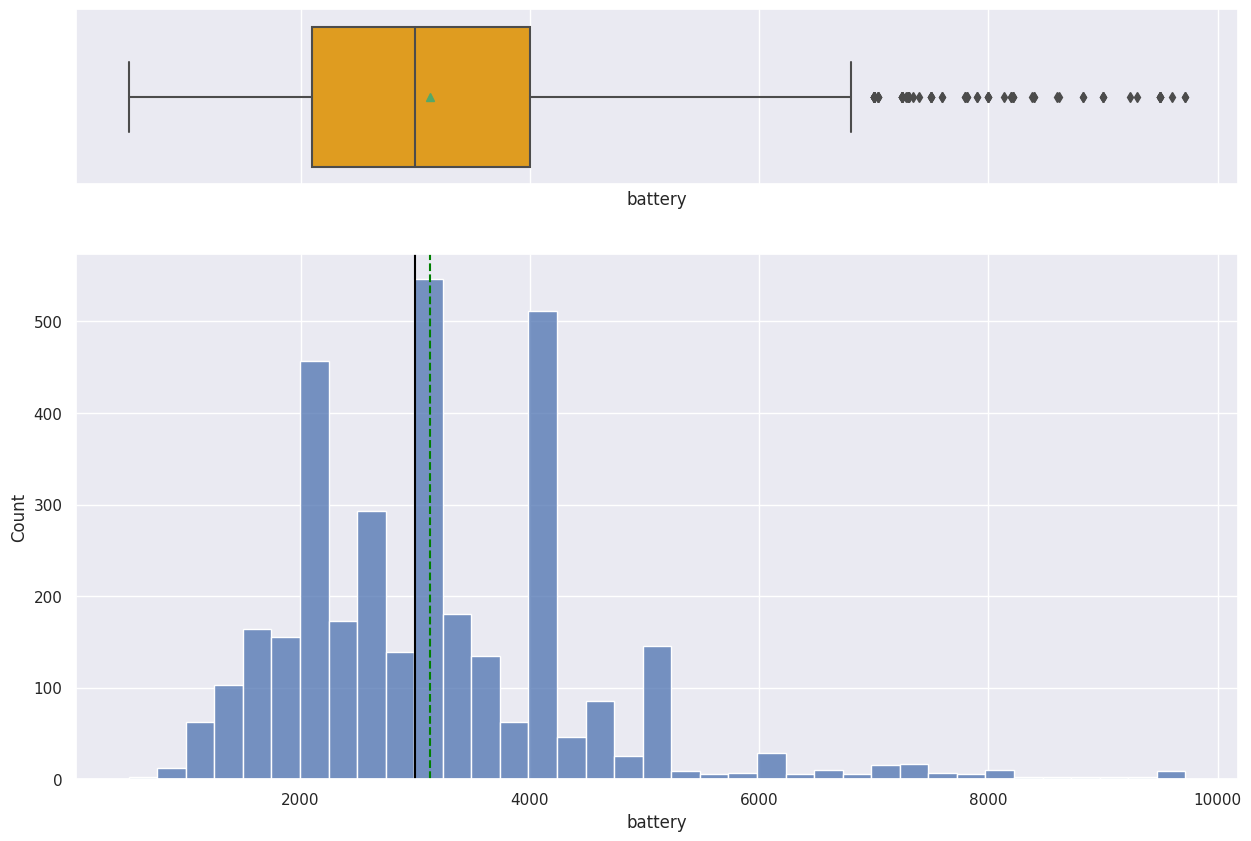

In [332]:
histogram_boxplot(df, 'battery')

Observation:

- Upon examining the boxplot, we observe that the 'battery' variable exhibits a slightly right-skewed distribution. The mean value of 3133.40 is greater than the median of 3000.00.
- Notably, the boxplot also reveals the presence of many outliers on right side, represented by the individual points beyond the whiskers.

**`days_used`**

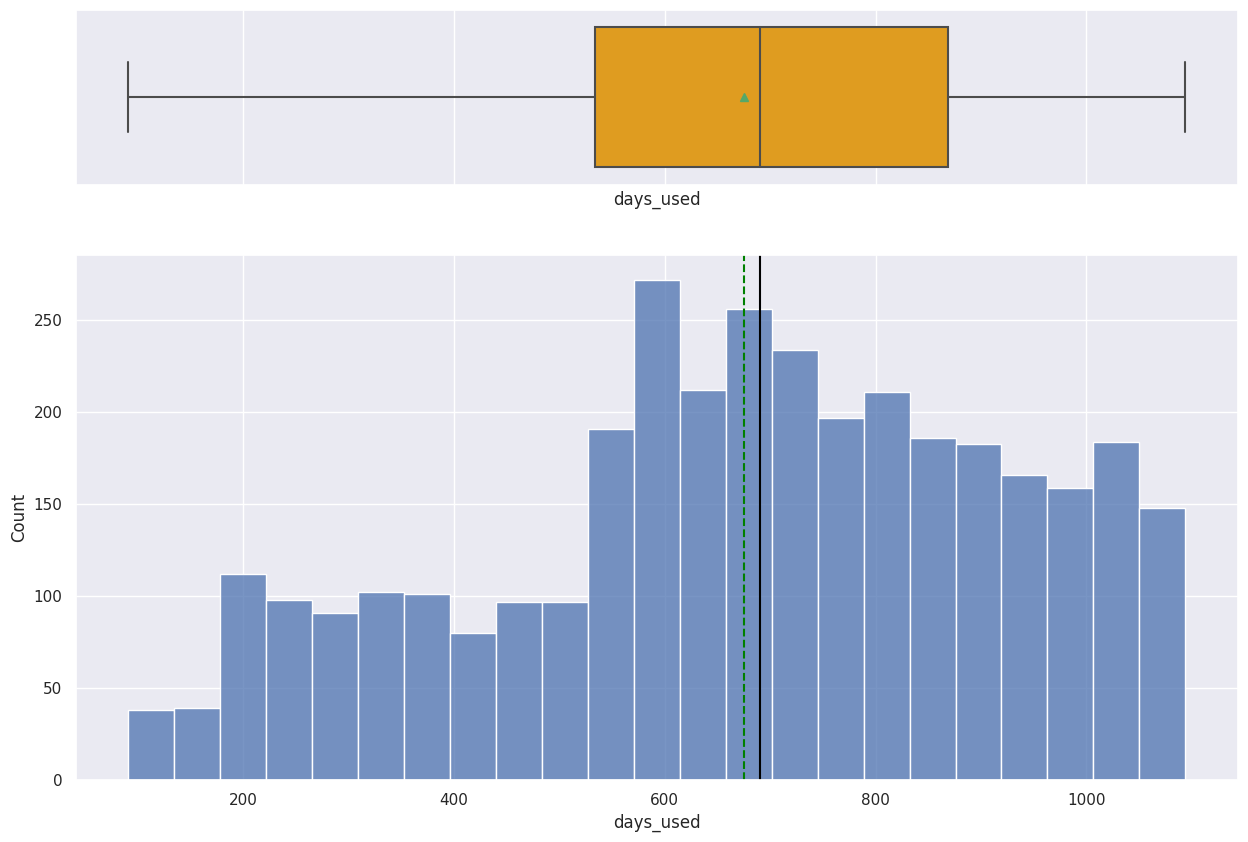

In [333]:
histogram_boxplot(df, 'days_used')

Observation:

- Upon examining the boxplot, we observe that the 'days_used' variable exhibits a slightly left-skewed distribution. The mean value of 674.87 is less than the median of 690.50.
- Notably, the boxplot also reveals no outliers on right side.

**`brand_name`**

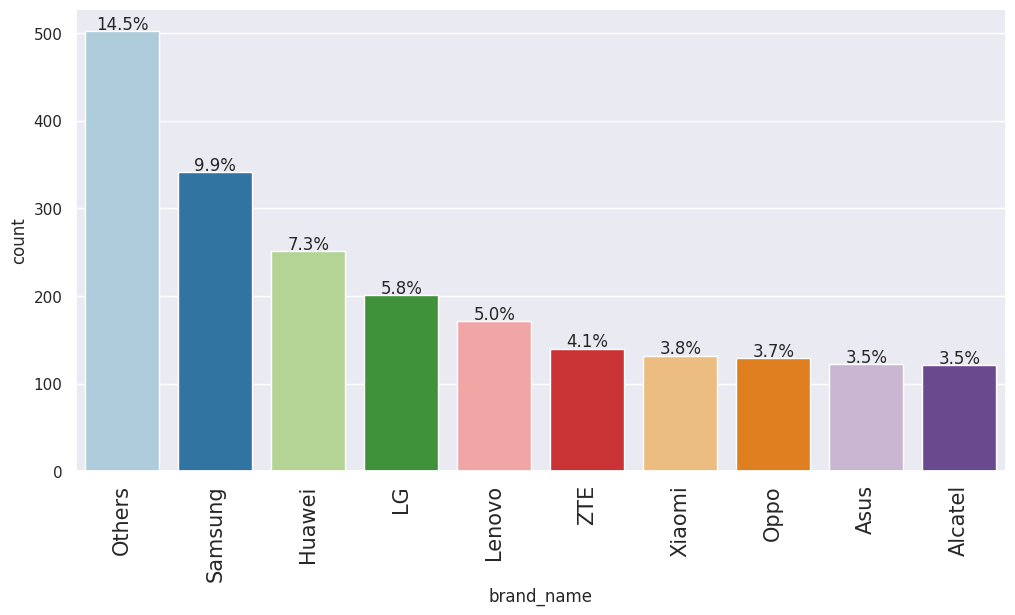

In [334]:
labeled_barplot(df, "brand_name", perc=True, n=10)

Observation:

- The brand distribution in the used and refurbished device market reveals that 'Others' account for the highest percentage, representing 14.5% of the devices. 
- 'Samsung' follows closely behind with a share of 9.9%. 
- This suggests that a significant portion of the market consists of various brands grouped under 'Others', while 'Samsung' holds a notable position as a popular brand choice among used and refurbished devices.

**`os`**

**Question 2: What percentage of the used device market is dominated by Android devices?**

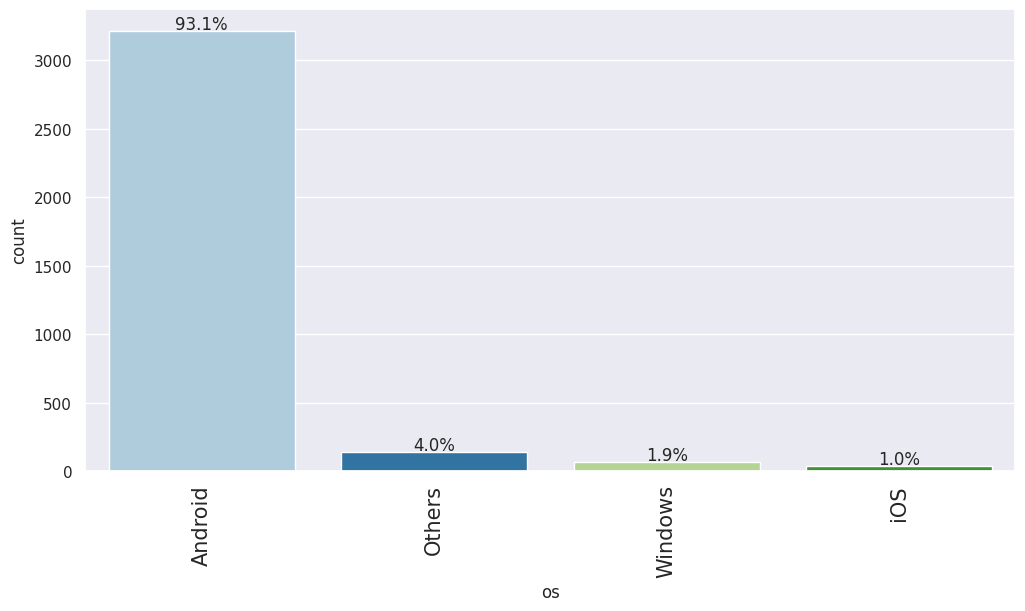

In [335]:
labeled_barplot(df, "os", perc=True, n=10)

Observation:

- Among the users, the majority, accounting for 93.1% of the total, are associated with the 'Android' os. Following far behind is the 'Others' os, with a usage rate of 4.0%. 
- These statistics indicate that a significant portion of the users prefers os categorized as 'Android'.

**`4g`**

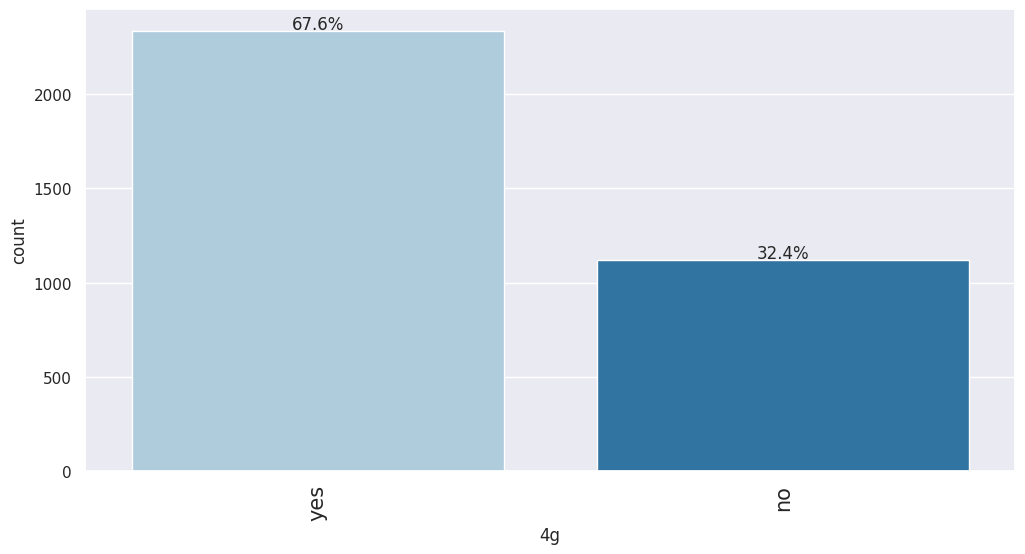

In [336]:
labeled_barplot(df, "4g", perc=True, n=10)

Observation:

- The majority of used and refurbished devices in the dataset, approximately 67.6%, support 4G connectivity. This suggests a strong demand for devices with advanced mobile internet capabilities. 
- The remaining 32.4% of devices do not have 4G functionality.

**`5g`**

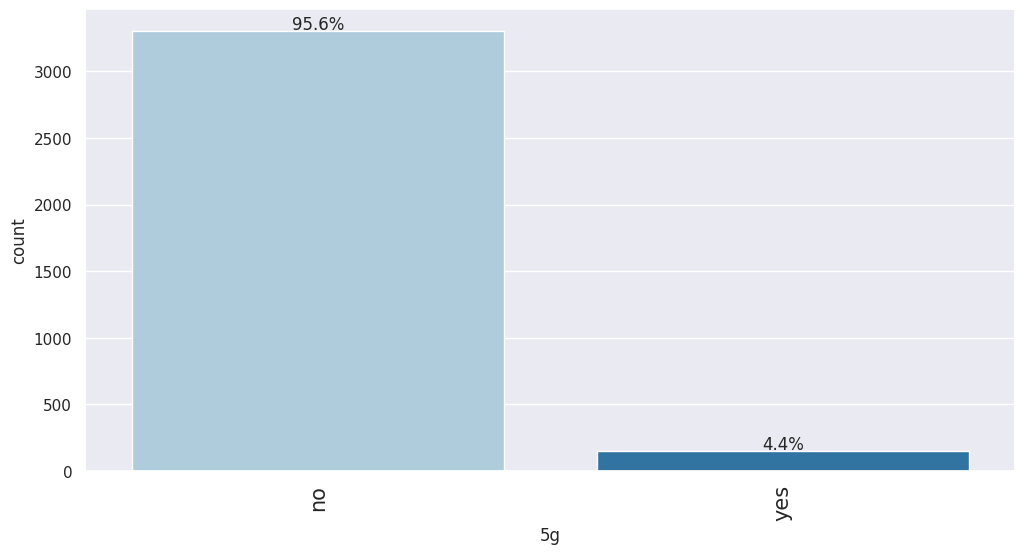

In [337]:
labeled_barplot(df, "5g", perc=True, n=10)

Observation:
- The barplot indicates that the vast majority, accounting for 95.6%, of the used and refurbished devices in the dataset do not support 5G connectivity. 
- Only a small percentage, approximately 4.4%, of the devices are equipped with 5G capabilities. This suggests that 5G-enabled devices are still relatively less common in the used and refurbished device market.

**`release_year`**

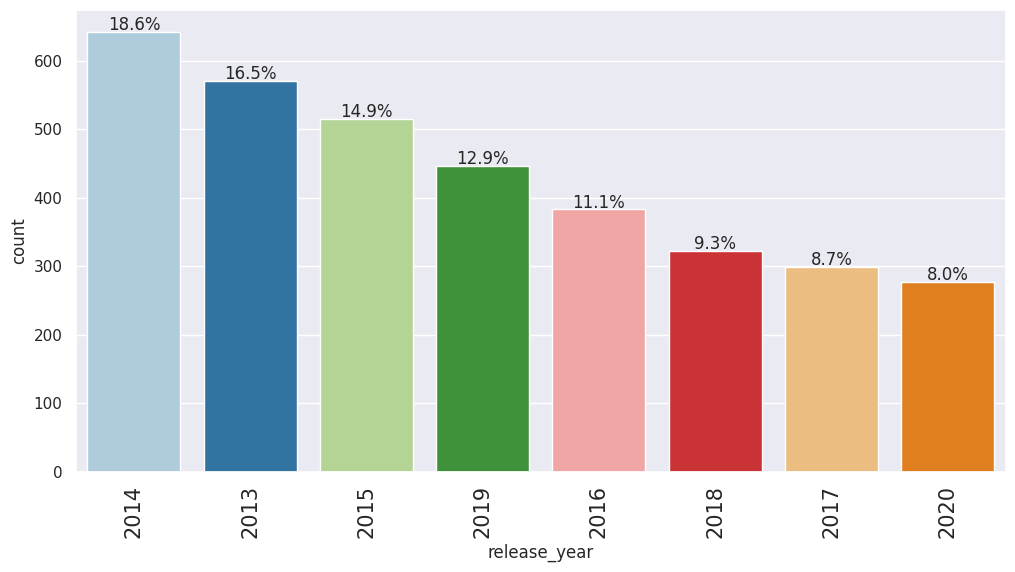

In [338]:
labeled_barplot(df, "release_year", perc=True, n=10)

Observation:

- The most common release year for refurbished devices is 2014, accounting for 18.6% of the total. 
- The second most prevalent release year is 2013, representing 16.5% of the refurbished devices.

### Bivariate Analysis

**Correlation Check**

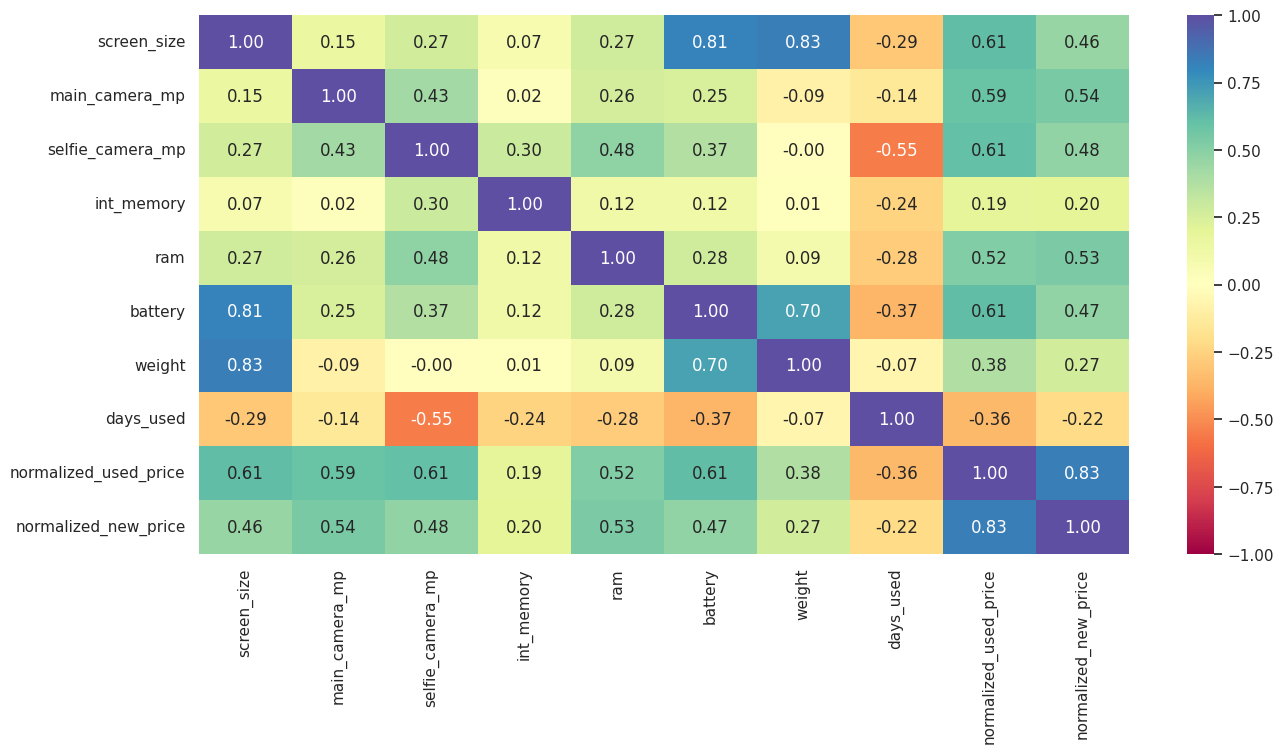

In [339]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observation:
- there is a strong positive correlation of 0.83 between 'normalized_used_price' and 'normalized_new_price', indicating that as the price of a used device increases, the price of a new device of the same model tends to increase as well.
-  'screen_size' and 'weight' exhibit a high correlation of 0.83, suggesting that larger screen sizes are often accompanied by higher device weights.
- the heatmap reveals a significant positive correlation of 0.81 between 'screen_size' and 'battery', implying that devices with larger screens tend to have larger battery capacities.
- there is a negative correlation of -0.55 between 'days_used' and 'selfie_camera_mp', indicating that as the number of days a device has been used increases, the resolution of the front camera tends to decrease.
- there is a negative correlation of -0.37 between 'days_used' and 'battery', suggesting that as the number of days a device has been used increases, the capacity of the device battery tends to decrease. 

**Question 3: The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

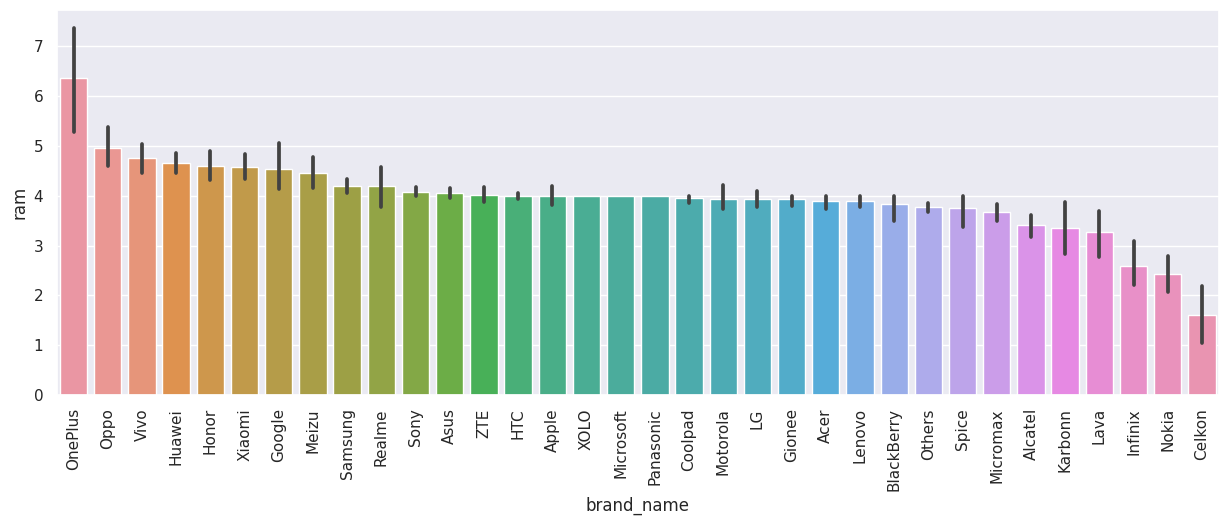

In [340]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="ram", order=df.groupby("brand_name")["ram"].mean().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

Observation:

- The bar plot depicting the amount of RAM across different brands reveals that OnePlus stands out with the highest average RAM compared to other brands. 
- This suggests that OnePlus devices offer a higher RAM capacity, which may contribute to a smoother and more efficient performance of their devices.

**Question 4: A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [341]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

In [342]:
df_large_battery["brand_name"].value_counts()

Samsung      50
Others       41
Huawei       37
Xiaomi       31
Lenovo       28
Asus         22
Apple        17
Honor        14
Motorola     14
Vivo         13
LG           12
Realme       12
Gionee       10
ZTE          10
Acer          7
Infinix       6
Sony          6
Oppo          4
Alcatel       1
Google        1
HTC           1
Micromax      1
Nokia         1
Panasonic     1
Spice         1
Name: brand_name, dtype: int64

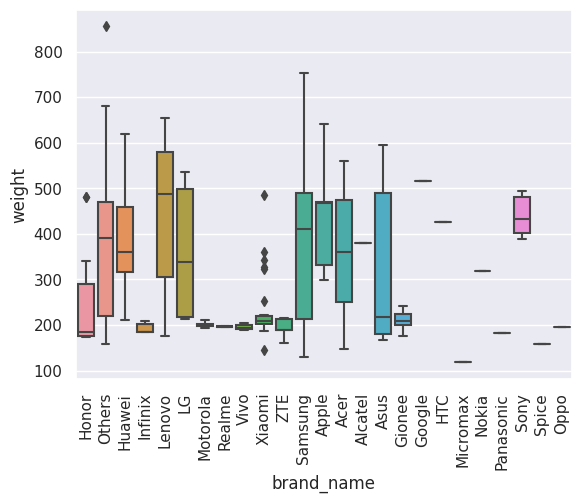

In [343]:
sns.boxplot(x="brand_name", y ="weight", data=df_large_battery)
plt.xticks(rotation=90);

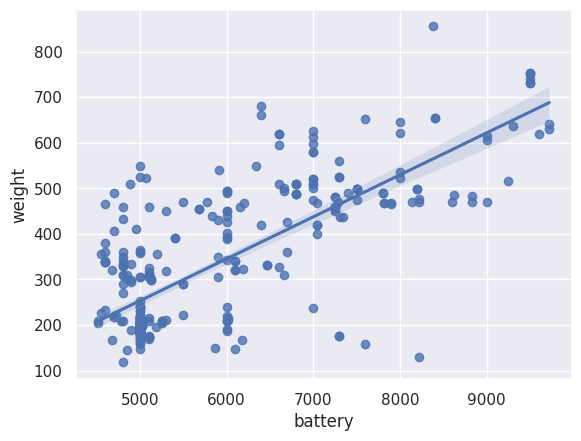

In [344]:
sns.regplot(x="battery", y ="weight", data=df_large_battery);

Observation:

- The Samsung brand gives most of its devices large batteries of more than 4500 mAh. This means samsung phones are heavier as compared to other brands.
- From the above plot, we can observe that an increase in battery capacity directly corresponds to an increase in device weight, emphasizing the relationship between battery size and the overall weight of a phone.

**Question 5: Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

In [345]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

In [346]:
df_large_screen['brand_name'].value_counts().head()

Huawei     149
Samsung    119
Others      99
Vivo        80
Honor       72
Name: brand_name, dtype: int64

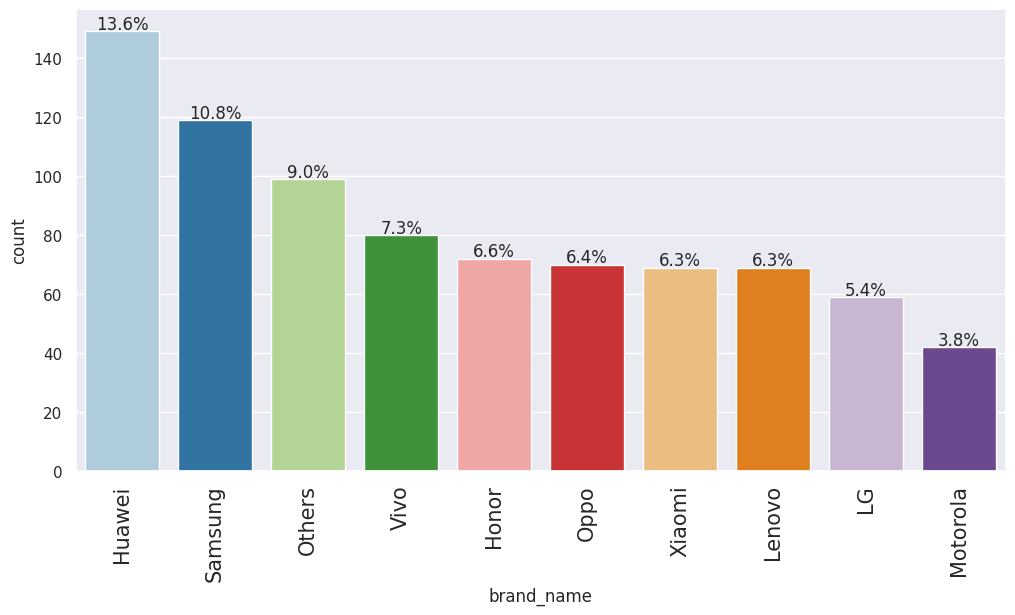

In [347]:
labeled_barplot(df_large_screen, "brand_name", perc=True, n=10)

Observation:

- The analysis of devices suitable for entertainment purposes reveals that Huawei holds the majority share with 13.6%, followed closely by Samsung at 10.8%. 
- These brands offer devices with large screens, catering to the preferences of individuals seeking an enhanced viewing experience.

**Quesyion 6: A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

In [348]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

In [349]:
df_selfie_camera['brand_name'].value_counts().head()

Huawei     87
Vivo       78
Oppo       75
Xiaomi     63
Samsung    57
Name: brand_name, dtype: int64

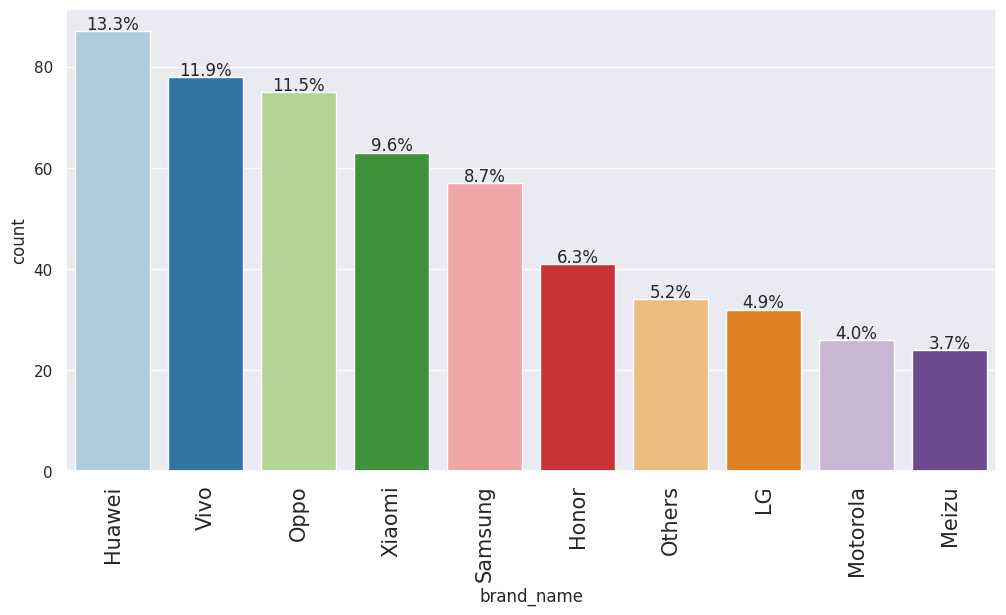

In [350]:
labeled_barplot(df_selfie_camera, "brand_name", perc=True, n=10)

Observation:
- The analysis of devices suitable for customers seeking good front cameras with mega pixels greater than 8 for capturing selfies reveals that Huawei leads the market with a share of 13.3%, closely followed by Vivo at 11.9%. 
- These brands offer devices that prioritize high-quality front camera capabilities, appealing to individuals who enjoy taking impressive selfies.

**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [351]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

In [352]:
df_main_camera['brand_name'].value_counts().head()

Sony        37
Motorola    11
Others       9
HTC          6
ZTE          5
Name: brand_name, dtype: int64

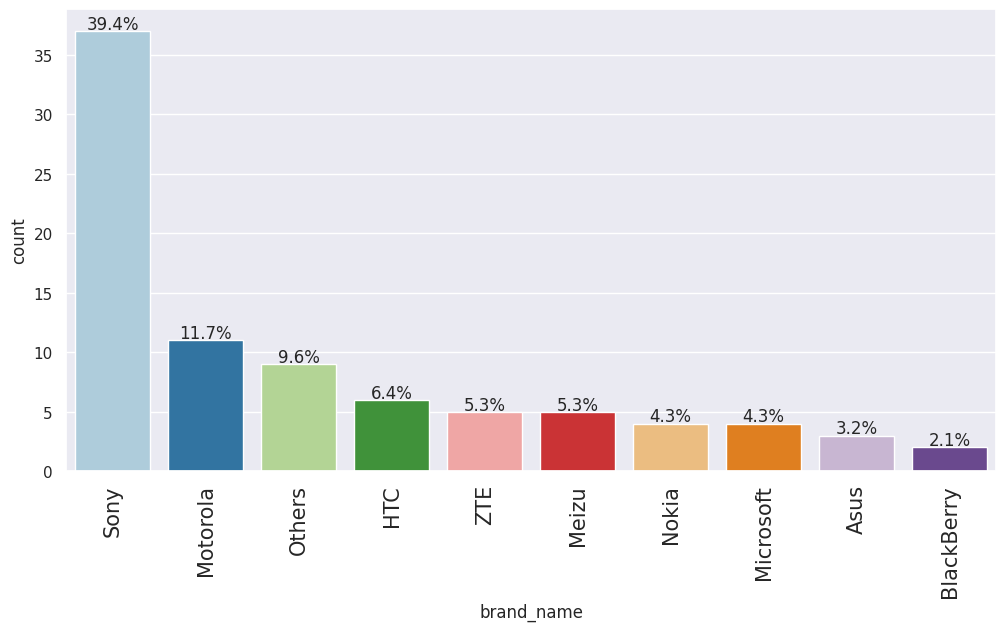

In [353]:
labeled_barplot(df_main_camera, "brand_name", perc=True, n=10)

Observation:
- Sony leads the market with a dominant share of 39.4% in devices with excellent rear cameras (mega pixels > 16), followed by Motorola with 11.7%. 
- These brands offer devices that prioritize high-resolution and advanced rear cameras, appealing to customers who value exceptional photography capabilities.

**Question 7: Which attributes are highly correlated with the normalized price of a used device?**

From the heat map above, we can observe that there is a strong positive correlation of 0.83 between 'normalized_used_price' and 'normalized_new_price', indicating that as the price of a used device increases, the price of a new device of the same model tends to increase as well. Apart from that, we can also check with other attributes to see if they are highly correlated with the normalized price of a used device.

**Let's see how the price of used devices varies across the years.**

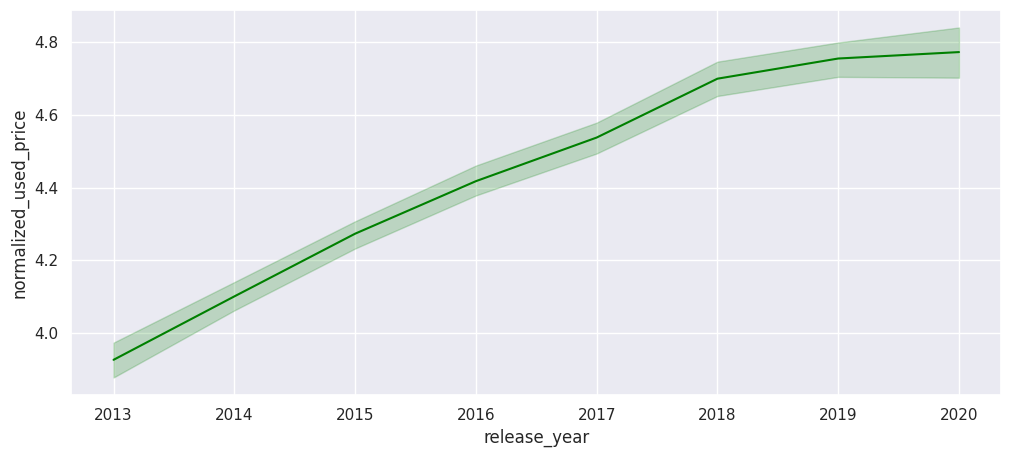

In [354]:
plt.figure(figsize=(12, 5))
sns.lineplot(x="release_year", y="normalized_used_price", data=df, color='green') 
plt.show()

Observation:
- Upon examining the line plot, it becomes evident that the price of refurbished phones exhibits an upward trend over the years. This implies that as the release year becomes more recent, the price tends to increase.

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

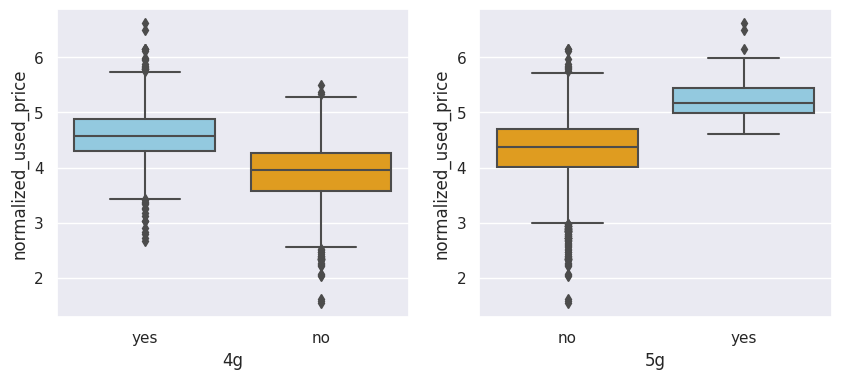

In [355]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price", palette={"yes": "skyblue", "no": "orange"})

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price", palette={"yes": "skyblue", "no": "orange"})

plt.show()


Observation:

- From the boxplot analysis, it is shown that the normalized used price tends to be higher for refurbished phones that have either 4G or 5G capability. 
- This suggests that the presence of these network technologies is associated with a higher price in the used phone market.

**Correlation between OS and Normalized Used Price**

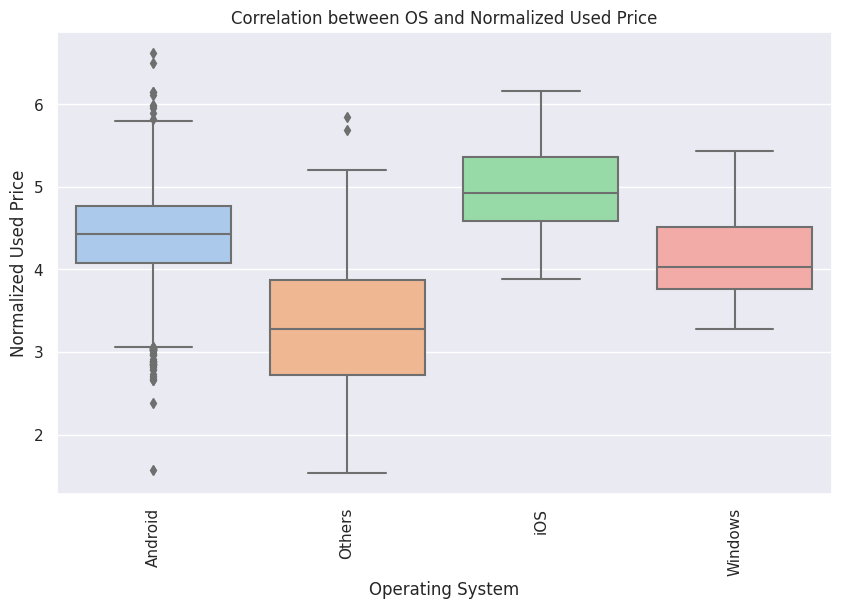

In [356]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='os', y='normalized_used_price', palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Operating System')
plt.ylabel('Normalized Used Price')
plt.title('Correlation between OS and Normalized Used Price')
plt.show()


Observation:
- From the box plot analysis, it can be observed that refurbished phones with the iOS operating system tend to have the highest normalized used prices compared to other operating systems. 
- Android phones exhibit a wider range of prices with numerous outliers on both ends, indicating significant price variations among different Android devices.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [357]:
# let's create a copy of the data
df1 = df.copy()

In [358]:
# let us looking at missing values in the dataframe again
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

We will impute missing values in the columns with median of the columns grouped by `release_year` and `brand_name`

In [359]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["brand_name", "release_year"])[col].transform("median")
    )   

# checking for missing values
df1.isnull().sum() 

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

There are still missing values.
We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [360]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    ) 

# checking for missing values
df1.isnull().sum() 

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

There are still missing values. We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [361]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

# checking for missing values
df1.isnull().sum() 

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

We have no missing values now.

### Feature Engineering

- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [362]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

### Outlier Check

- Let's check for outliers in the data.

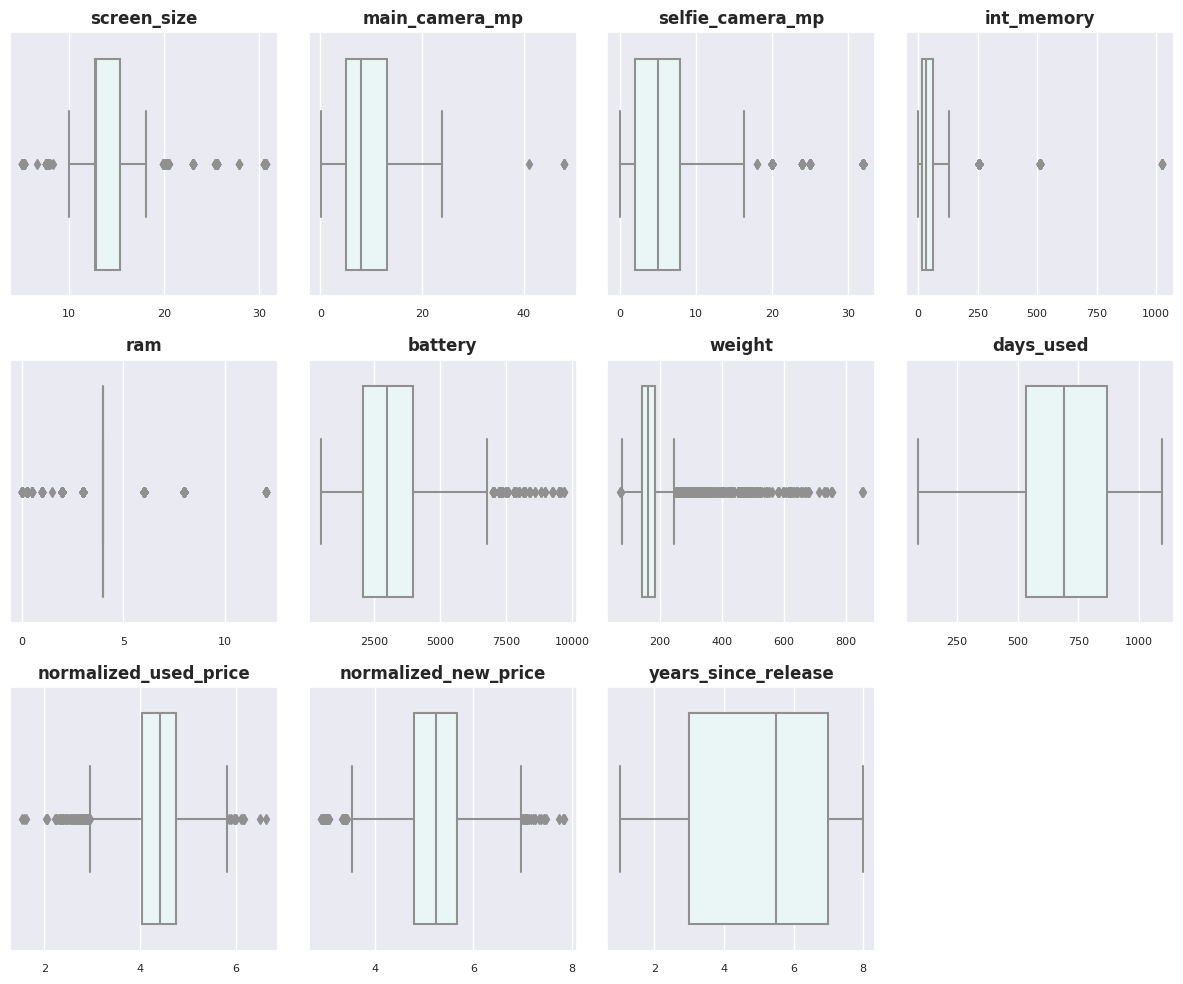

In [363]:
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x=variable, color="#e8f8f8")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(variable, fontsize=12, fontweight="bold")
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()

plt.show()


Observation:
- Outliers are present in all the numerical columns except for release_year and days_used.

- In this case we will not treat the outliers, since treating the outliers can lead to loss of information.

####**EDA after data manipulation**

In [364]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3454.0,9.617597,4.749438,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3454.0,6.555067,6.968440,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3454.0,54.528474,84.934991,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3454.0,4.032620,1.368598,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3454.0,3132.577446,1298.884193,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3454.0,182.636856,88.360445,69.000000,142.000000,160.000000,185.000000,855.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433
normalized_new_price,3454.0,5.233107,0.683637,2.901422,4.790342,5.245892,5.673718,7.847841


In [365]:
# check df1 has no missing values as required
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
days_used                0
normalized_used_price    0
normalized_new_price     0
years_since_release      0
dtype: int64

In [366]:
# take a look at how df1 data looks like now
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


In [367]:
df1["brand_name"].nunique()

34

- Before preparing data for modeling, Let us drop the `brand_name` column. This column has very many categories(34) which means after creating dummies, very many columns will be formed.
- This information in the brand name column can be grouped int os which column we already have and with fewer unique values.

In [368]:
df1.drop(["brand_name"], axis=1, inplace=True) # drop brand_name column
df1.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


We dropped the `brand_name` column. Now, we will check the data types for each column.

In [369]:
df1.dtypes

os                        object
screen_size              float64
4g                        object
5g                        object
main_camera_mp           float64
selfie_camera_mp         float64
int_memory               float64
ram                      float64
battery                  float64
weight                   float64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
years_since_release        int64
dtype: object

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [370]:
# define dependent and independent variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print()
print(y.head())

        os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android        14.50  yes   no            13.0               5.0   
1  Android        17.30  yes  yes            13.0              16.0   
2  Android        16.69  yes  yes            13.0               8.0   
3  Android        25.50  yes  yes            13.0               8.0   
4  Android        15.32  yes   no            13.0               8.0   

   int_memory  ram  battery  weight  days_used  normalized_new_price  \
0        64.0  3.0   3020.0   146.0        127              4.715100   
1       128.0  8.0   4300.0   213.0        325              5.519018   
2       128.0  8.0   4200.0   213.0        162              5.884631   
3        64.0  6.0   7250.0   480.0        345              5.630961   
4        64.0  3.0   5000.0   185.0        293              4.947837   

   years_since_release  
0                    1  
1                    1  
2                    1  
3                    1  
4              

In [371]:
# let's add the intercept to data
X = sm.add_constant(X)

In [372]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
) 

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1,0,0,0,1,0


In [373]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [374]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [375]:
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     850.5
Date:                   Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                           16:09:21   Log-Likelihood:                 98.614
No. Observations:                   2417   AIC:                            -165.2
Df Residuals:                       2401   BIC:                            -72.58
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.841**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.3703**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `normalized_new_price` is **0.4215**.

## Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [376]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [377]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232297,0.18226,0.841612,0.840556,4.377609


In [378]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test) 
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236589,0.183001,0.844808,0.842374,4.467715


**Observations**

- An $R^2$ value of 0.84 for both the training and test data indicates that the model is able to explain 84% of the variation in the target variable. The similar performance on both the training and test data suggests that the model has generalized well and is not overfitting.

- Additionally, the RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error) values are relatively low for both training and test data, indicating that the model's predictions are close to the actual values with a small average error.

- MAE suggests that the model can predict the normalized price of the used/refurbished device within a mean error of 0.18 on the test data

- MAPE of 4.47 on the test data means that we are able to predict within 4.47% of the normalized price of the used/refurbished device.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [379]:
#Define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [380]:
checking_vif(x_train)

,feature,VIF
0,const,124.287701
1,screen_size,7.245006
2,main_camera_mp,1.996930
3,selfie_camera_mp,2.575590
4,int_memory,1.247856
5,ram,2.117161
6,battery,3.848932
7,weight,6.127196
8,days_used,2.578113
9,normalized_new_price,2.632565


- screen_size and weight show moderate collinearity. Let us go ahead and treat the multicollinearity.

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [381]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [382]:
col_list = ['screen_size', 'weight'] 

res = treating_multicollinearity(x_train, y_train, col_list) 
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.837274,0.235506
1,screen_size,0.836820,0.235834


Accroding to the above result, we will drop the 'weight' column in order to remove multicollinearity.

In [383]:
col_to_drop = 'weight'
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] 
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,107.333228
1,screen_size,3.402137
2,main_camera_mp,1.903762
3,selfie_camera_mp,2.541463
4,int_memory,1.247526
5,ram,2.113643
6,battery,3.469627
7,days_used,2.564951
8,normalized_new_price,2.626262
9,years_since_release,4.466062


* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [384]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     888.9
Date:                   Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                           16:09:22   Log-Likelihood:                 72.978
No. Observations:                   2417   AIC:                            -116.0
Df Residuals:                       2402   BIC:                            -29.10
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

- We can see that adj. R-squared has almost no changes (0.841 - before dealing with multicollinearity; 0.837 - after dealing with multicollinearity), which shows that the dropped column did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [385]:
# initial list of columns
predictors = x_train2.copy() 
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'normalized_new_price', 'years_since_release', '4g_yes']


In [386]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [387]:
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1556.
Date:                   Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                           16:09:22   Log-Likelihood:                 70.534
No. Observations:                   2417   AIC:                            -123.1
Df Residuals:                       2408   BIC:                            -70.96
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [388]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235011,0.184164,0.837889,0.837283,4.417875


In [389]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238672,0.184313,0.842064,0.84068,4.491491


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with.
* Now adjusted R-squared is 0.837, i.e., our model is able to explain ~84% of the variance.
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.841.
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting.

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [390]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.864746,0.222741
1525,4.448399,4.571687,-0.123288
1128,4.315353,4.284426,0.030926
3003,4.282068,4.258956,0.023112
2907,4.456438,4.451207,0.005231


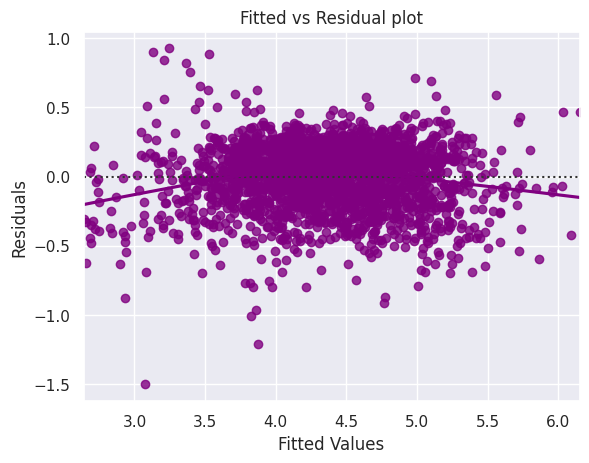

In [391]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

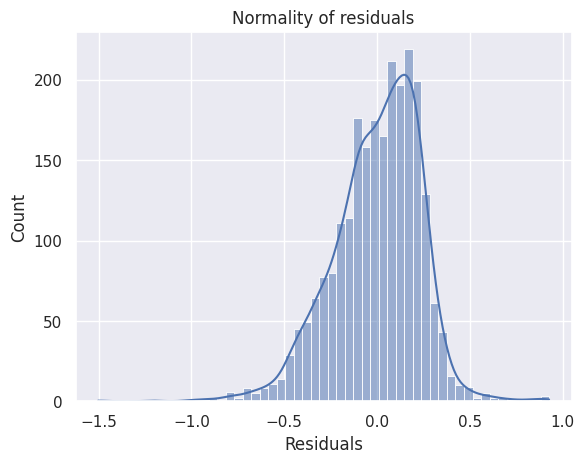

In [392]:
sns.histplot(data=df_pred, x="Residuals", kde=True) 
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

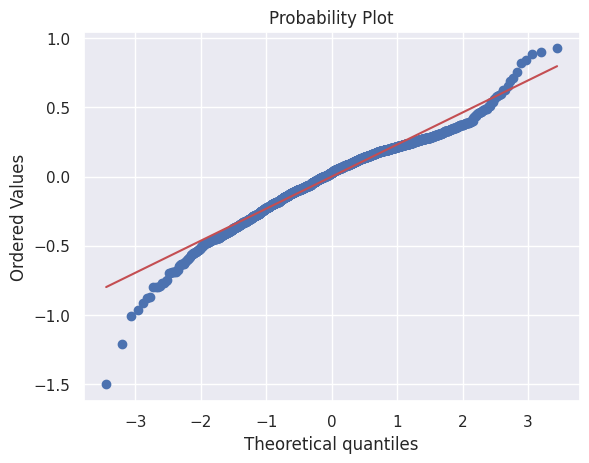

In [393]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [394]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9712689518928528, pvalue=1.2969799215209546e-21)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [395]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0648757500800878), ('p-value', 0.13825250199575034)]

**Since p-value > 0.05, we can say that the residuals are *homoscedastic*. So, this assumption is satisfied.**

## Predictions on test data

In [396]:
# predictions on the test set
pred = olsmodel2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.377852
2341,3.696103,3.960691
1913,3.592093,3.766597
688,4.306495,4.104456
650,4.522115,5.122448
2291,4.259294,4.398194
40,4.997685,5.410093
1884,3.875359,4.111013
2538,4.206631,4.049228
45,5.380450,5.307608


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.
- We can also visualize comparison result as a bar graph for a sample of 25 records below.

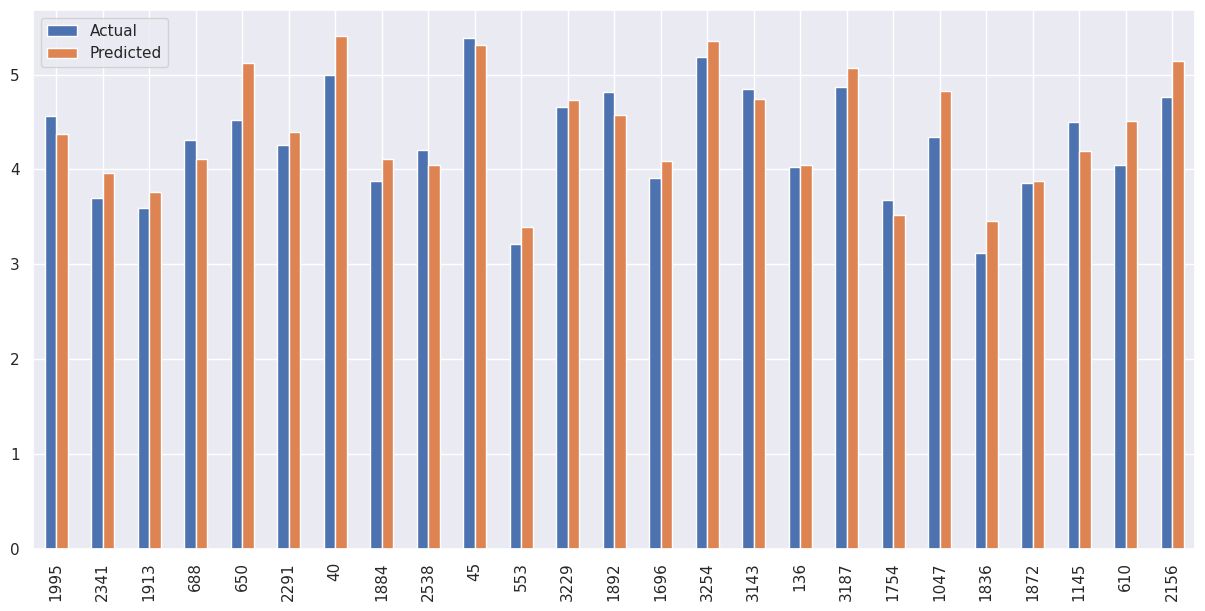

In [397]:
df3 = df_pred_test.sample(25, random_state=1)
df3.plot(kind="bar", figsize=(15, 7))
plt.show()

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [398]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [399]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1556.
Date:                   Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                           16:09:25   Log-Likelihood:                 70.534
No. Observations:                   2417   AIC:                            -123.1
Df Residuals:                       2408   BIC:                            -70.96
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [400]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235011,0.184164,0.837889,0.837283,4.417875


In [401]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238672,0.184313,0.842064,0.84068,4.491491


* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.5% of the normalized price of the used/refurbished device

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations 

#Insights
1. The model is able to explain ~84% of the variation in the data and within 4.5% of the normalized price of the used/refurbished device on the test data, which is good.
    - This indicates that the model is good for prediction as well as inference purposes.
2. If the `normalized_new_price` increases by one unit, then the predicted `normalized_used_price` of the used/refurbished device increases by 0.4270 units, assuming all other variables are held constant.
3. `screen_size`, `main_camera_mp`, `selfie_camera_mp`, `ram`, `4g` and `normalized_new_price` have positive coefficients with `normalized_used_price`. So, as they increase, the price of used devices also increases.
4. If the `years_since_release` variable increases by one unit, then the predicted `normalized_used_price` of the used/refurbished device decreases by 0.1453 units, assuming all other variables are held constant.
5. If the `os` is other than Android, iOS, and windows, it will have negative coefficients with `normalized_used_price`. Hence as they increase, the price of used devices decrease.

#Recommendations
1. Adjust Pricing Based on New Device Price: 
  - Take into account the normalized price of a new device of the same model when pricing used/refurbished devices. Higher new device prices correlate with higher predicted `normalized_used_price`.
2. Emphasize Camera Specifications: 
  - Highlight the main camera and selfie camera resolutions in your marketing efforts as they significantly influence the predicted `normalized_used_price`. Customers value devices with higher camera resolutions.
3. Offer Devices with Larger Screen Sizes: 
  - Consider offering devices with larger screen sizes, as they positively impact the predicted `normalized_used_price`. Highlight the advantages of a larger display to attract customers.
4. Highlight 4G Capabilities: 
  - Promote the 4G capabilities of the used/refurbished devices. Having 4G availability is associated with a higher predicted `normalized_used_price` and appeals to customers seeking faster internet speeds and better connectivity.
5. Prioritize Newer Device Models: 
  - Highlight and prioritize newer device models in your offerings. The number of `years_since_release` has a negative impact on the predicted `normalized_used_price`. Customers tend to prefer the latest technology.
6. Highlight OS Features: 
  - Differentiate the offerings based on the operating system (OS) of the used/refurbished devices. Android operating system is the most popular choice for the customer. 


___